<a href="https://colab.research.google.com/github/srivatsan88/Tensorflow2.0_Samples/blob/master/TF_datasets_and_splits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-alpha0 tensorflow-datasets matplotlib

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [3]:
tfds.list_builders()

['bair_robot_pushing_small',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cifar10',
 'cifar100',
 'coco2014',
 'diabetic_retinopathy_detection',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'fashion_mnist',
 'image_label_folder',
 'imagenet2012',
 'imdb_reviews',
 'lm1b',
 'lsun',
 'mnist',
 'moving_mnist',
 'nsynth',
 'omniglot',
 'open_images_v4',
 'quickdraw_bitmap',
 'squad',
 'starcraft_video',
 'svhn_cropped',
 'tf_flowers',
 'wmt_translate_ende',
 'wmt_translate_enfr']

In [0]:
ninty, ten = tfds.Split.TRAIN.subsplit([9,1])


In [0]:
mnist_train,info = tfds.load(name="mnist", split=ninty, with_info=True)

In [0]:
mnist_val = tfds.load(name="mnist", split=ten)

In [7]:
mnist_train

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

Label: 3


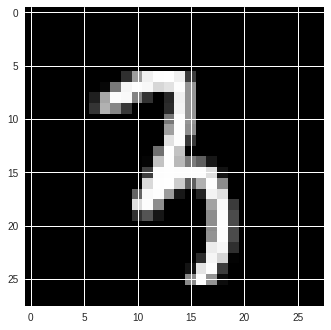

In [8]:
mnist_first, = mnist_train.take(1)
image, label = mnist_first["image"], mnist_first["label"]

plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
print("Label: %d" % label.numpy())

In [0]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)

mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)


In [10]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['http://yann.lecun.com/exdb/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10)
    },
    total_num_examples=70000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=10000>,
        'train': <tfds.core.SplitInfo num_examples=60000>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @article{lecun2010mnist,
          title={MNIST handwritten digit database},
          author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
          journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
          volume={2},
          year={2010}
        }
        
    """',
)



In [11]:
mnist_train

<PrefetchDataset shapes: {image: (None, 28, 28, 1), label: (None,)}, types: {image: tf.uint8, label: tf.int64}>